In [1]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.xception import preprocess_input
# import matplotlib.pyplot as plt
# import cv2
#
# # Load your trained model
# model = model
# print(f"Model input shape: {model.input_shape}")
#
# # Load image with higher resolution first, then resize
# def load_and_preprocess_image(img_path, target_size=(224, 224)):
#     # Load at higher resolution first
#     high_res_img = cv2.imread(img_path)
#     high_res_img = cv2.cvtColor(high_res_img, cv2.COLOR_BGR2RGB)
#
#     # Resize to target size with interpolation
#     img = cv2.resize(high_res_img, target_size, interpolation=cv2.INTER_AREA)
#
#     # Convert to array and preprocess
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x)
#     return x, img
#
# img_path = img_path
# x, orig_img = load_and_preprocess_image(img_path)
#
# # Enhanced Grad-CAM with Guided Backpropagation
# def make_guided_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
#     # First, get the gradients of the output wrt the last conv layer (standard Grad-CAM)
#     grad_model = tf.keras.models.Model(
#         [model.inputs],
#         [model.get_layer(last_conv_layer_name).output, model.output]
#     )
#
#     with tf.GradientTape() as tape:
#         conv_outputs, predictions = grad_model(img_array)
#         if pred_index is None:
#             pred_index = tf.argmax(predictions[0])
#         class_channel = predictions[:, pred_index]
#
#     grads = tape.gradient(class_channel, conv_outputs)
#
#     # Guided backpropagation - only positive gradients
#     grads = tf.maximum(grads, 0)
#
#     # Global average pooling of gradients
#     pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
#
#     # Weight the conv outputs with pooled gradients
#     conv_outputs = conv_outputs[0]
#     heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
#     heatmap = tf.squeeze(heatmap)
#
#     # Normalize between 0 and 1 with better contrast
#     heatmap = tf.maximum(heatmap, 0)
#     max_val = tf.math.reduce_max(heatmap)
#     if max_val != 0:
#         heatmap = heatmap / max_val
#
#     # Apply a small threshold to remove noise
#     heatmap = tf.where(heatmap < 0.1, 0.0, heatmap)
#
#     return heatmap.numpy()
#
# # For Xception, these are good layers to try
# last_conv_layer_names = [
#     'block14_sepconv2_act',  # Last layer
#     'block13_sepconv2_act',  # Deeper layer
#     'block12_sepconv2_act',  # Even deeper
#     'block11_sepconv2_act',
#     'block10_sepconv2_act',
#     'block9_sepconv2_act',
#     'block8_sepconv2_act',
#     'block7_sepconv2_act',
#     'block6_sepconv2_act',
#     'block5_sepconv2_act'
# ]
#
# # Generate heatmaps for multiple layers
# heatmaps = []
# for layer_name in last_conv_layer_names[:1]:  # Just use the last layer for now
#     try:
#         heatmap = make_guided_gradcam_heatmap(x, model, layer_name)
#         heatmaps.append(heatmap)
#     except ValueError as e:
#         print(f"Couldn't use layer {layer_name}: {e}")
#
# # Combine heatmaps if multiple layers were used
# # Combine heatmaps if multiple layers were used
# if len(heatmaps) > 1:
#     combined_heatmap = np.mean(heatmaps, axis=0)
# else:
#     combined_heatmap = heatmaps[0]
#
# # Ensure the heatmap is in the correct format for OpenCV
# combined_heatmap = combined_heatmap.astype(np.float32)
#
# # Apply Gaussian blur for smoother visualization
# combined_heatmap = cv2.GaussianBlur(combined_heatmap, (5, 5), 1)
#
# # Convert to uint8 0-255
# heatmap = np.uint8(255 * combined_heatmap)
#
# # Superimpose with better blending
# def superimpose_heatmap(image, heatmap, alpha=0.5):
#     # Resize heatmap if needed
#     if heatmap.shape != image.shape[:2]:
#         heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
#
#     # Normalize and apply colormap
#     heatmap = cv2.normalize(heatmap, None, 0, 255, cv2.NORM_MINMAX)
#     heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
#
#     # Convert image to BGR if it's RGB
#     if image.shape[-1] == 3 and len(image.shape) == 3:
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#
#     # Superimpose with better blending
#     superimposed = cv2.addWeighted(image, 1-alpha, heatmap_color, alpha, 0)
#     return superimposed
#
# superimposed_img = superimpose_heatmap(orig_img, heatmap, alpha=0.5)
#
# # Enhanced visualization
# plt.figure(figsize=(10, 5))
#
# plt.subplot(1, 3, 1)
# plt.title('Original Image')
# plt.axis('off')
# plt.imshow(orig_img)
#
# plt.subplot(1, 3, 2)
# plt.title('Enhanced Grad-CAM Heatmap')
# plt.axis('off')
# plt.imshow(heatmap, cmap='jet')
#
# plt.subplot(1, 3, 3)
# plt.title('Precision Overlay')
# plt.axis('off')
# plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
#
# plt.tight_layout()
# plt.show()

In [2]:
import os
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input


In [3]:
# Load your trained model
model_path = "Xception_model.keras"  # Update this to your model path
model = tf.keras.models.load_model(model_path)
print(f"✅ Model loaded. Input shape: {model.input_shape}")


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4050 Laptop GPU, compute capability 8.9
✅ Model loaded. Input shape: (None, 224, 224, 3)


In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [5]:
# Image preprocessing
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    high_res_img = cv2.imread(img_path)
    high_res_img = cv2.cvtColor(high_res_img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(high_res_img, target_size, interpolation=cv2.INTER_AREA)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x, img

# Grad-CAM with guided gradients
def make_guided_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    grads = tf.maximum(grads, 0)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0)

    if tf.reduce_max(heatmap) != 0:
        heatmap /= tf.reduce_max(heatmap)
    heatmap = tf.where(heatmap < 0.1, 0.0, heatmap)
    return heatmap.numpy()

# Overlay function
def superimpose_heatmap(image, heatmap, alpha=0.5):
    if heatmap.shape != image.shape[:2]:
        heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap = cv2.normalize(heatmap, None, 0, 255, cv2.NORM_MINMAX)
    heatmap_color = cv2.applyColorMap(np.uint8(heatmap), cv2.COLORMAP_JET)
    if image.shape[-1] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    superimposed = cv2.addWeighted(image, 1 - alpha, heatmap_color, alpha, 0)
    return superimposed

# List of candidate layers
last_conv_layer_names = [
    'block14_sepconv2_act',
    'block13_sepconv2_act',
    'block12_sepconv2_act',
    'block11_sepconv2_act',
    'block10_sepconv2_act',
    'block9_sepconv2_act',
    'block8_sepconv2_act',
    'block7_sepconv2_act',
    'block6_sepconv2_act',
    'block5_sepconv2_act'
]

# 🔍 Multi-layer Grad-CAM visualizer
def generate_and_plot_gradcam(img_path, model, layer_names=last_conv_layer_names):
    assert os.path.exists(img_path), f"❌ Invalid path: {img_path}"
    x, orig_img = load_and_preprocess_image(img_path)

    fig, axes = plt.subplots(len(layer_names), 3, figsize=(9, 3 * len(layer_names)))
    if len(layer_names) == 1:
        axes = np.expand_dims(axes, axis=0)

    for i, layer_name in enumerate(layer_names):
        try:
            heatmap = make_guided_gradcam_heatmap(x, model, layer_name)
            heatmap = cv2.GaussianBlur(heatmap.astype(np.float32), (5, 5), 1)
            heatmap_uint8 = np.uint8(255 * heatmap)
            overlay_img = superimpose_heatmap(orig_img.copy(), heatmap_uint8)

            axes[i, 0].imshow(orig_img)
            axes[i, 0].set_title(f"Original\n({layer_name})")
            axes[i, 1].imshow(heatmap_uint8, cmap='jet')
            axes[i, 1].set_title("Grad-CAM")
            axes[i, 2].imshow(cv2.cvtColor(overlay_img, cv2.COLOR_BGR2RGB))
            axes[i, 2].set_title("Overlay")

            for j in range(3):
                axes[i, j].axis('off')

        except Exception as e:
            print(f"⚠️ Could not generate Grad-CAM for layer {layer_name}: {e}")
            for j in range(3):
                axes[i, j].axis('off')
                axes[i, j].set_title(f"{layer_name} - Failed")

    plt.tight_layout()
    plt.show()


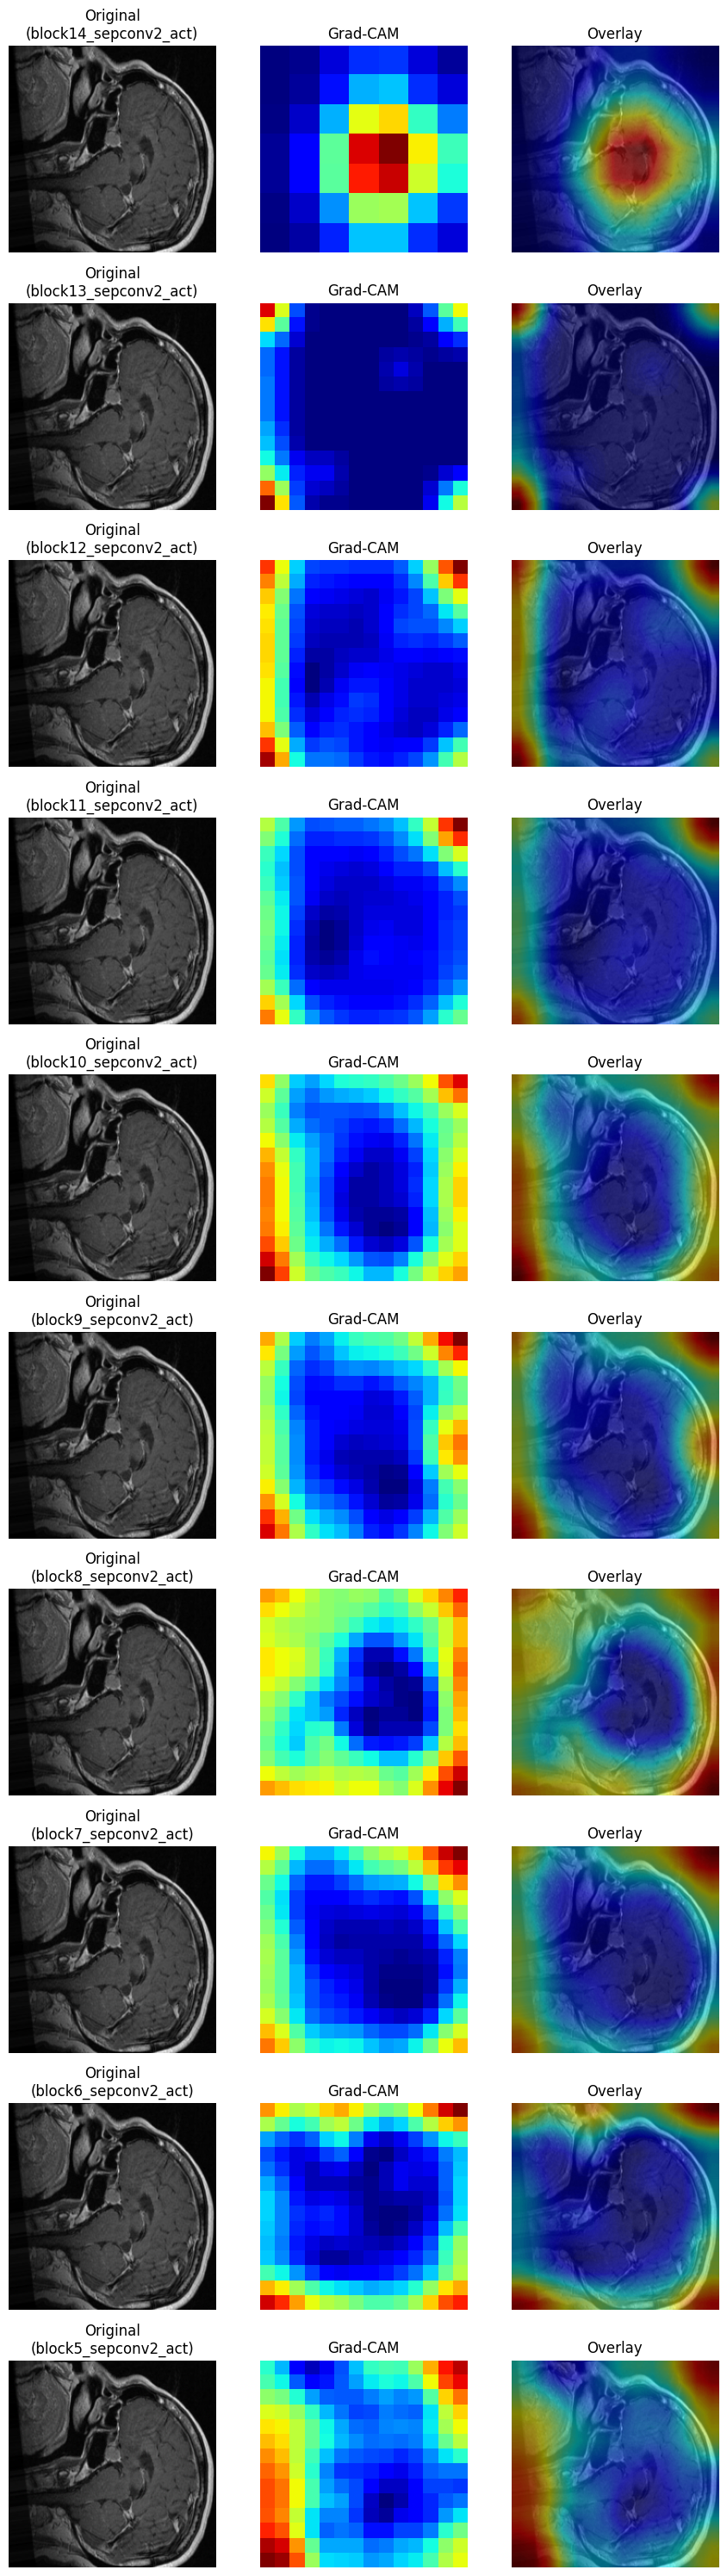

In [6]:
# 🖼️ Input your image path here
# img_path = input("Enter full image path:  ").strip()
img_path = "Multi_Class_p1/Multi Cancer/Unified_Classes/brain_tumor/brain_tumor_0001.jpg"

# 🔥 Generate Grad-CAM for all layers
generate_and_plot_gradcam(img_path, model)
